In [2]:
!pip install seaborn==0.9.0

In [3]:
!pip install numpy==1.23.5

# Aula 3 - Um projeto de baixa dimensionalidade e o baseline
##

In [4]:
import pandas as pd 

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [6]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizados'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [7]:
#troca = {
#    0 : 'finalizado',
#    1 : 'não_finalizado'
#}
#dados['teste'] = dados.nao_finalizado.map(troca)
#dados.head()

In [8]:
#dados['finalizados'].value_counts()

<Axes: xlabel='horas_esperadas', ylabel='preco'>

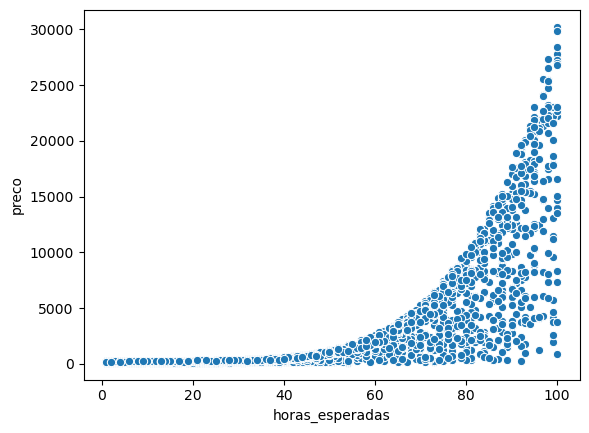

In [9]:
import seaborn as sns

sns.scatterplot(x = 'horas_esperadas', y = 'preco', data = dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

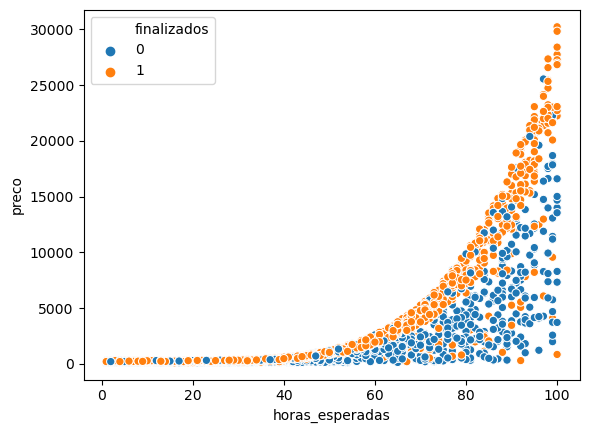

In [10]:
sns.scatterplot(x = 'horas_esperadas', y = 'preco', hue="finalizados", data = dados)

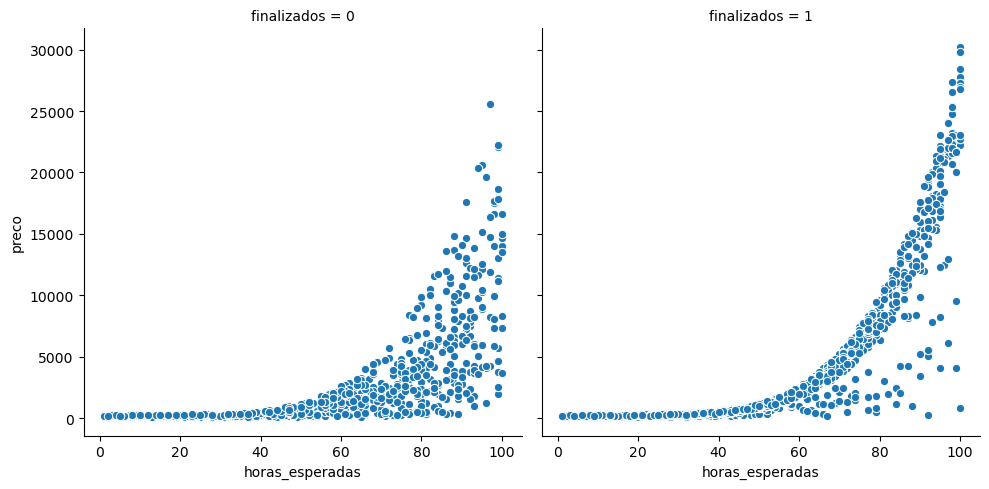

In [11]:
sns.relplot(x = 'horas_esperadas', y = 'preco', col="finalizados", data = dados)

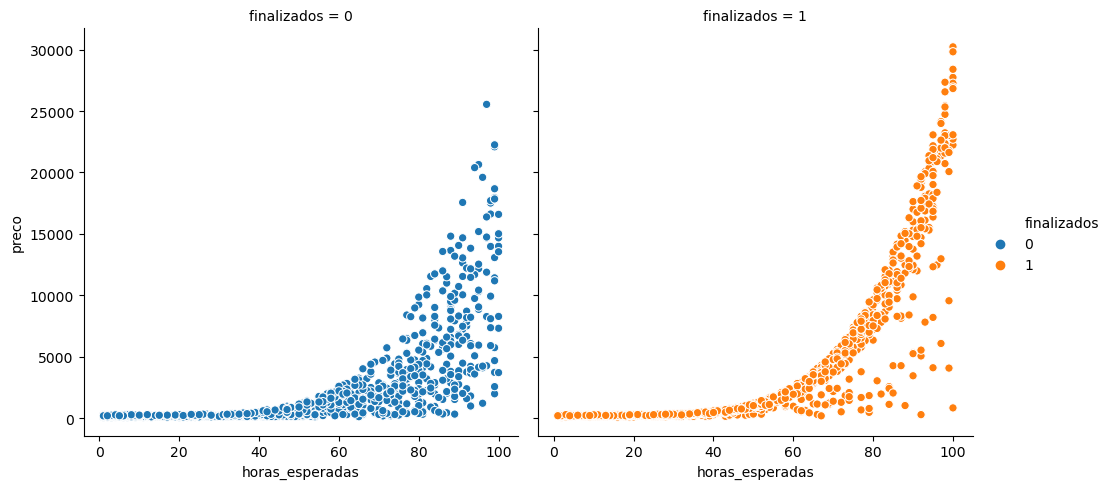

In [12]:
sns.relplot(x = 'horas_esperadas', y = 'preco', col="finalizados", hue = 'finalizados', data = dados)

In [13]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizados']

In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, 
                                                        test_size= 0.25, random_state = SEED, 
                                                        stratify = y)

print("Treinamos com %d elementos e testamos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)*100
print("Taxa de acerto: %.2f%%" % taxa_de_acerto)

Treinamos com 1617 elementos e testamos com 540 elementos
Taxa de acerto: 52.59%


/Users/fernandes/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [17]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi de %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi de 52.59%


## Criando a curva de decisão

<Axes: xlabel='horas_esperadas', ylabel='preco'>

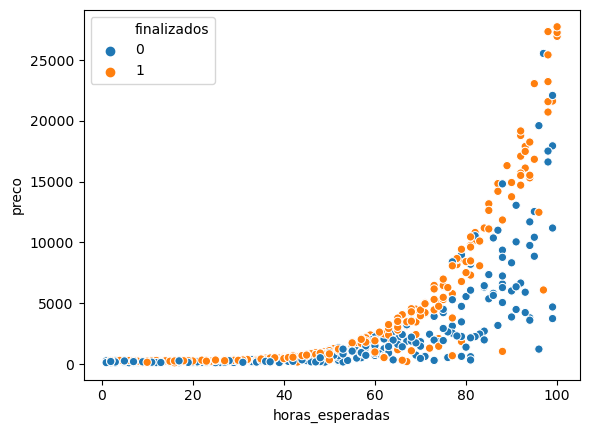

In [18]:
sns.scatterplot(x = 'horas_esperadas', y = 'preco', hue=teste_y, data = teste_x)

## Verificar, de forma visual, a saída do nosso classificador

In [24]:
import numpy as np

x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [25]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [27]:
xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [29]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

/Users/fernandes/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

Text(0.5, 1.0, 'Curva de aprendizagem')

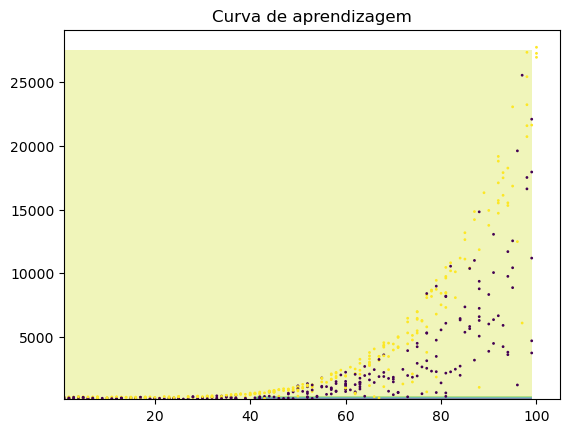

In [32]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)
plt.title('Curva de aprendizagem')